# Near State-of-the-Art results at Object Recognition

In this project, we will be deploying a convolutional neural network (CNN) for object recognition. More specifically, we will be using the All-CNN network published in the 2015 ICLR paper, "Striving For Simplicity: The All Convolutional Net". 
This paper can be found at the following link:

https://arxiv.org/pdf/1412.6806.pdf

This convolutional neural network obtained state-of-the-art performance at object recognition on the CIFAR-10 image dataset in 2015. We will build this model using Keras, a high-level neural network application programming interface (API) that supports both Theano and Tensorflow backends.

## Importing the libraries

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

Using TensorFlow backend.


## Loading the Data

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Data PreProcessing
### Exploring the data

In [3]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


### For Single Image

In [4]:
print(X_train[0].shape)

(32, 32, 3)


### Create a grid of 3x3 images

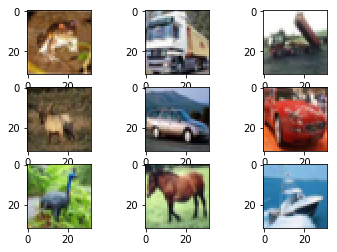

In [5]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[i]
    plt.imshow(img)

plt.show()

### Normalize the inputs from 0-255 to 0.0-1.0

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


# class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


### One-Hot encode outputs

In [7]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Building the All-CNN
Using the paper as a reference, we can implement the All-CNN network in Keras. Keras models are built by simply adding layers, one after another.

To make things easier for us later, we will wrap this model in a function, which will allow us to quickly and neatly generate the model later on in the project

### Start building the model - import necessary layers

In [8]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

### Function

In [9]:
def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()

    # add model layers - Convolution2D, Activation, Dropout
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model

## Defining Parameters and Training the Model

## Define hyper parameters

In [10]:
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

### Build model 

In [11]:
model = allcnn()

### Define optimizer and compile model

In [12]:
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

### Print model summary

In [13]:
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       166080    
__________

### Define additional training parameters

In [14]:
epochs = 350
batch_size = 32

### Fiting the model

In [ ]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)

### Test the model

In [17]:
scores = model.evaluate(X_test, Y_test, verbose = 1)
print('Accuracy: {}%'.format(scores[1]*100))

10000/10000 [==============================] - 84s 8ms/step
Accuracy: 79.14%


### Make dictionary of class labels and names

In [32]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

### Zip the names and classes to make a dictionary of class_label

In [33]:
class_labels = dict(zip(classes, names))

### Generate batch of 9 images to predict

In [34]:
batch = X_test[110:119]
labels = np.argmax(Y_test[110:119],axis=-1)

### Make predictions

In [35]:
predictions = model.predict(batch, verbose = 1)
print (predictions)

9/9 [==============================] - 0s 12ms/step
[[5.7960369e-06 3.0165750e-06 1.7457379e-02 2.6851043e-02 8.1172532e-01
  4.6393070e-02 2.1564558e-03 9.5398106e-02 4.6078367e-06 5.2085220e-06]
 [9.9728775e-01 7.2634459e-05 1.9635465e-03 2.9702746e-06 1.1695394e-05
  1.0118093e-07 5.2291687e-09 1.1992894e-06 6.5007329e-04 1.0102859e-05]
 [1.1789384e-01 5.5016414e-03 7.9792434e-01 5.6489801e-04 1.3383563e-03
  4.7579393e-05 7.1316525e-02 2.7299277e-04 4.8625977e-03 2.7730022e-04]
 [4.7392277e-07 2.0336127e-08 9.9966443e-01 8.6985718e-05 6.8380126e-05
  7.5780335e-05 1.0346964e-04 8.3603524e-08 6.8344363e-08 1.9418559e-07]
 [1.4234560e-05 9.9918109e-01 6.3895541e-08 1.8014797e-08 1.3156242e-09
  1.1135802e-09 1.3602194e-07 3.1360365e-09 4.0709294e-04 3.9727282e-04]
 [1.3007323e-04 1.6388482e-05 1.7443993e-04 7.7612233e-01 1.6926189e-03
  9.0474427e-02 1.1600473e-04 1.3125956e-01 5.6022088e-08 1.4133886e-05]
 [9.8794997e-01 1.3533796e-07 6.9734021e-03 1.8118391e-05 4.9607316e-03
  1.07

### These are individual class probabilities, should sum to 1.0 (100%)

In [36]:
for image in predictions:
    print(np.sum(image))

1.0
1.0000001
1.0000001
0.9999998
0.9999999
1.0
1.0
0.99999976
0.99999994


### Use np.argmax() to convert class probabilities to class labels

In [37]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)

[4 0 2 2 1 3 0 4 2]


### Create a grid of 3x3 images

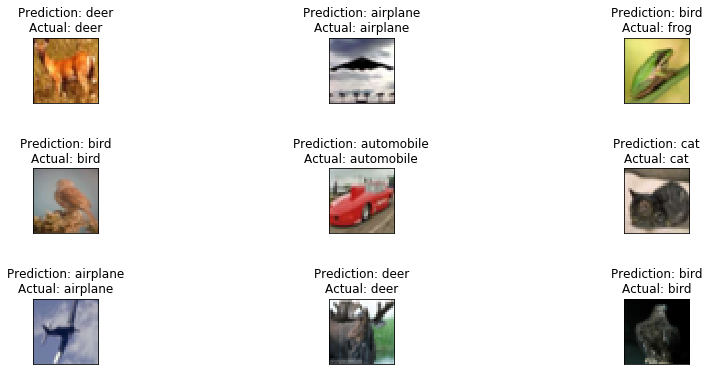

In [38]:
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()